# Figures pour le papier

## Spectrogrammes

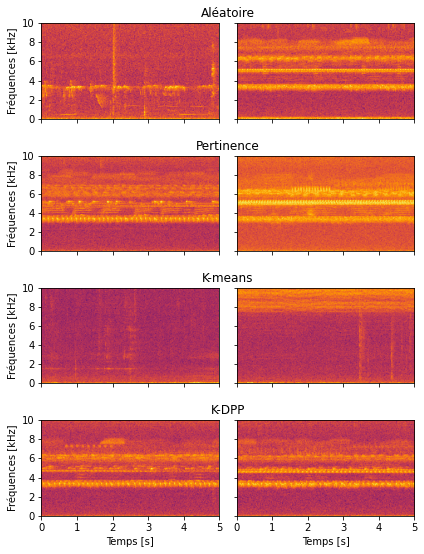

In [1]:
from affichageDonnees import displaySamplingsSpectrogram
from echantillonnages import sampling_random, sampling_pertinence, sampling_kmeans, sampling_dpp

nbSamples = 2
samplingNames = ["Aléatoire", "Pertinence", "K-means", "K-DPP"]
samplingFunctions = [sampling_random, sampling_pertinence, sampling_kmeans, sampling_dpp]
height = 2
width = 3
descriptorName = 'scalogramStat4'
J = 12
Q = 3
pertinenceFunction = 'inverse'
root = './soundDatabase'
cmap = 'inferno'
title = ""
labelFontSize = 10
labelFontWeight = 'normal'
subtitlesFontSize = 12
subtitlesFontWeight = 'normal'
titleFontSize = 13
titleFontWeight = 'semibold'


displaySamplingsSpectrogram(nbSamples, samplingNames, samplingFunctions, height, width, descriptorName, J, Q, pertinenceFunction, root, cmap, title, labelFontSize, labelFontWeight, subtitlesFontSize, subtitlesFontWeight, titleFontSize, titleFontWeight)

## Evolution du nombres d'oiseaux en fonction de k

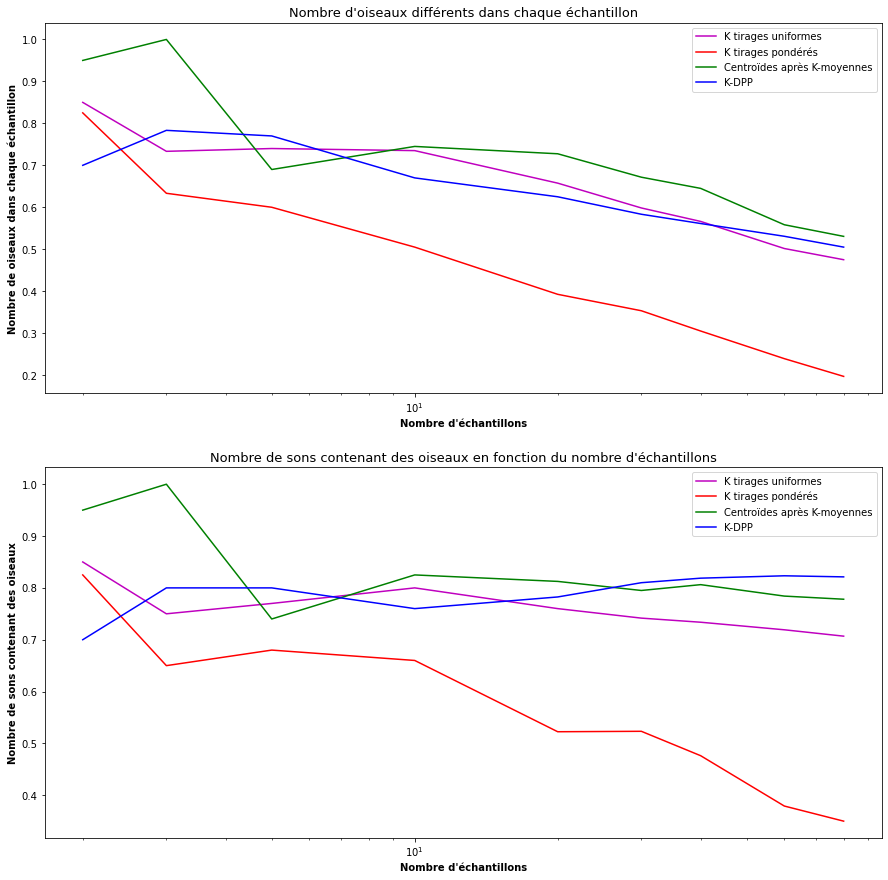

<Figure size 720x360 with 0 Axes>

In [1]:
from affichageDonnees import displayDoubleOracle

sampling_names = ["Random", "Pertinence", "K-means", "K-DPP"]
nbSamplesList = [2, 3, 5, 10, 20, 30, 40, 60, 80]
nbSamplings = 20
color_list = ['m', 'r', 'g', 'b']
descriptorName = 'scalogramStat1'
bird_search_mode = 'single'
bird_confidence_limit = 0.1
pertinenceFunction = 'inverse'
J = 12
Q = 3

dispParams = {
    "title1": "Nombre d'oiseaux différents dans chaque échantillon",
    "title2" : "Nombre de sons contenant des oiseaux en fonction du nombre d'échantillons",
    "x1label" : "Nombre d'échantillons",
    "x2label" : "Nombre d'échantillons",
    "y1label" : "Nombre de oiseaux dans chaque échantillon",
    "y2label" : "Nombre de sons contenant des oiseaux",
    "figureSize": (15,15), 
    "titleFontSize" : 13, 
    "titleFontWeight" : 'normal', 
    'labelFontSize' : 10, 
    'labelFontWeight' : 'bold',
    'legend' : ["K tirages uniformes", "K tirages pondérés", "Centroïdes après K-moyennes", "K-DPP", "K-tirage optimaux (oracle)"]
    }
displayDoubleOracle(sampling_names, nbSamplesList, nbSamplings, bird_search_mode, bird_confidence_limit, pertinenceFunction, color_list, dispParams, root = './BirdNET', descriptorName = descriptorName, J = J, Q = Q)


## Nuages de points pertinence/diversité

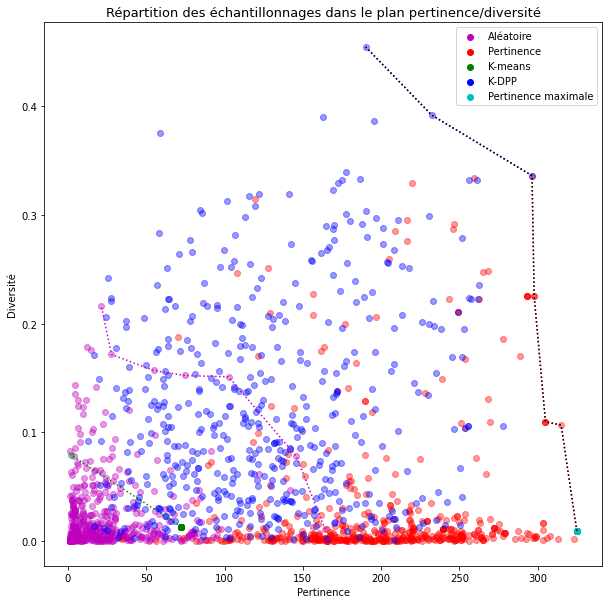

Number of points in the Pareto front per sampling
Random : 0
Pertinence : 7
K-means : 0
K-DPP : 2
MaxPertinence : 500

Area under the Pareto front per sampling
Random : 23.387530101473494
Pertinence : 102.90107283477965
K-means : 3.4060370844162926
K-DPP : 127.61602734368248
MaxPertinence : 3.0470511301160403


In [5]:
from affichageDonnees import displaySamplingClouds

nbSamples = 3
nbSamplings = 500
samplingNames = ["Random", "Pertinence", "K-means", "K-DPP", "MaxPertinence"]
color_list = ['m', 'r', 'g', 'b', 'c']
descriptorName = 'scalogramStat1'
J = 12
Q = 3
pertinenceFunction = 'inverse'
displayPareto = True
figSize = (10, 10)
title = "Répartition des échantillonnages dans le plan pertinence/diversité"
titleFontSize = 13
titleFontWeight = 'normal'
labelFontSize = 10
labelFontWeight = 'normal'
legendNames = ["Aléatoire", "Pertinence", "K-means", "K-DPP", "Pertinence maximale"]
xLabel = "Pertinence"
yLabel = "Diversité"


displaySamplingClouds(samplingNames, nbSamples, nbSamplings, color_list, descriptorName, J, Q, pertinenceFunction, displayPareto, title, xLabel, yLabel, figSize, labelFontSize, labelFontWeight, titleFontSize, titleFontWeight, legendNames)